In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../../../nadavp/new_trap/Tools/')
import BeadDataFile
sys.path.append('../../../nadavp/new_trap/Tools/StatFramework/')
from likelihood_calculator import likelihood_analyser

In [3]:
%matplotlib notebook

In [4]:
%reload_ext autoreload
%autoreload 2

In [6]:
fname = '/home/data_transfer/data_from_windows/20190929/Bead1/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(140,185)]
bdf_x = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

In [7]:
lc = likelihood_analyser.LikelihoodAnalyser()

In [120]:
fname = '/home/data_transfer/data_from_windows/20190929/Bead1/Milicharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(0,60)]
bdf_mc1000 = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

In [121]:
freq = 151
scale = np.mean(bdf_x[1].z2)
x = bdf_x[0].z2/scale*1000
x_all = [bdf_.z2/scale*1000 for bdf_ in bdf_x]

freq = 151
x_mc_all = [bdf_.z2/scale*1000 for bdf_ in bdf_mc1000]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


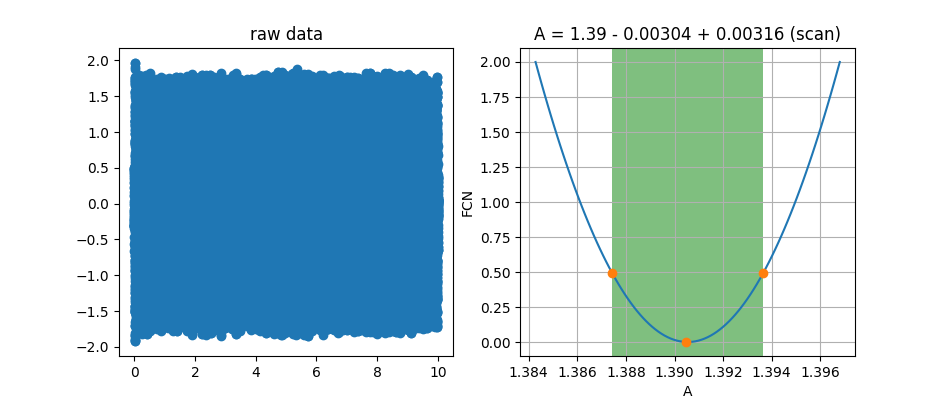

In [158]:
# fit arguments
freq = 151
fit_kwargs = {'A': 1, 'f': freq, 'phi': 2.48, 'sigma': 0.7, 'error_sigma':1, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 0.5,
              'limit_phi': [0, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_sigma': True}

m = lc.find_mle_sin(x, drive_freq=freq, bandwidth=50, plot=True, **fit_kwargs)

In [163]:
print(m.values),m.fval / (len(x) - 2) ,m.covariance
print(m.errors[0],m.values[0])

<ValueView of Minuit at d4799f8>
  A: 1.3905412938128356
  f: 151.0
  phi: 2.48
  sigma: 0.7
0.003130495160854035 1.3905412938128356


In [169]:
freq = 151
fit_kwargs = {'A': 1, 'f': freq, 'phi': 2.468, 'sigma': 0.7, 'error_sigma':1, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 0.5,
              'limit_phi': [0, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_sigma': True}
m = [lc.find_mle_sin(x_, drive_freq=freq, bandwidth=50, plot=False, **fit_kwargs) for x_ in x_all]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [111]:
print(m[1].values), m[5].fval / (len(x) - 2)

<ValueView of Minuit at d4719b8>
  A: 0.2591467810337038
  f: 151.0
  phi: 2.468
  sigma: 0.7


(None, 0.9953154252966323)

In [178]:
freq = 151
fit_kwargs = {'A': 1, 'f': freq, 'phi': 2.468, 'sigma': 0.7, 'error_sigma':1, 'error_A': 2, 'error_f': 10, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [np.pi, 2 * np.pi],
              'print_level': 0, 'fix_f': True, 'fix_phi': True, 'fix_sigma': True}
m_mc = [lc.find_mle_sin(x_, drive_freq=freq, bandwidth=50, plot=False, **fit_kwargs) for x_ in x_mc_all]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [166]:
np.mean([ m_.fval / (len(x) - 2) for m_ in m_mc])

1.010512392600733

<IPython.core.display.Javascript object>


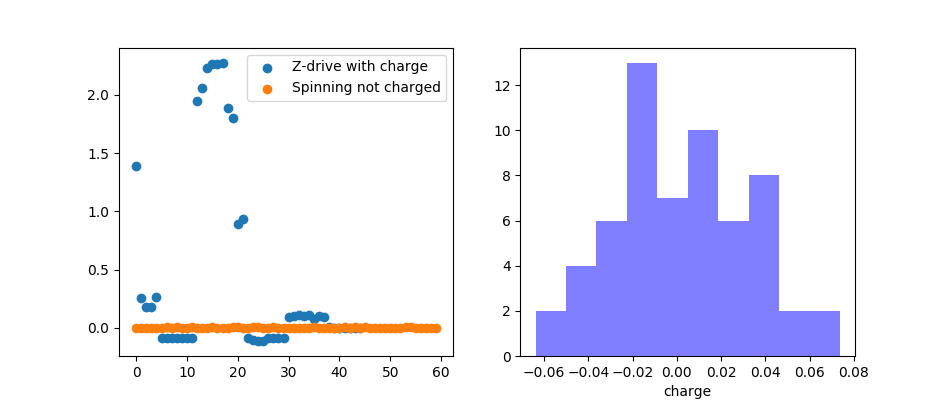

0.0025906961504355377 0.03025560091650447


In [179]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
m_a = np.array([m_.np_values()[0] for m_ in m])
ax[0].scatter(range(len(m_a)),m_a, label='Z-drive with charge')
m_a_mc = np.array([m_.np_values()[0] for m_ in m_mc])
ax[0].scatter(range(len(m_a_mc)),m_a_mc, label='Spinning not charged')
ax[0].legend()

ax[1].hist(m_a_mc/0.09, 10, facecolor='blue', alpha=0.5)
ax[1].set(xlabel='charge')
print(np.mean(m_a_mc/0.09),np.std(m_a_mc/0.09))


<IPython.core.display.Javascript object>


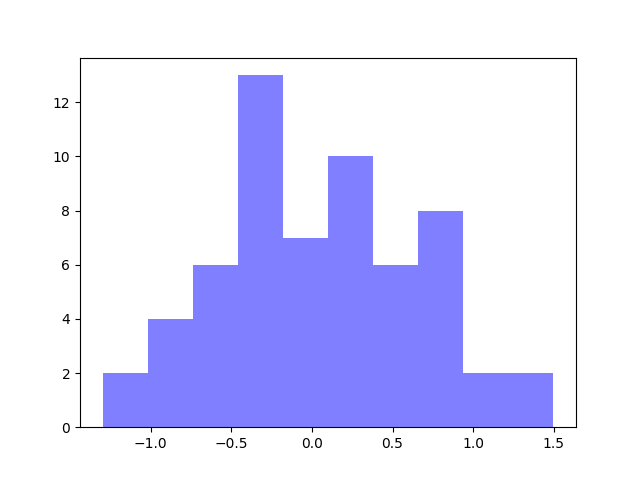

0.6150639270847762

In [180]:
_,ax = plt.subplots()
bbb = [mmm.values[0]/mmm.errors[0] for mmm in m_mc]
ax.hist(bbb, 10, facecolor='blue', alpha=0.5)
np.std(bbb)

### Trying again with newer method

In [7]:
fname = '/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(200,300)]
bdf_mc200 = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinning data
Error loading spinni

<IPython.core.display.Javascript object>


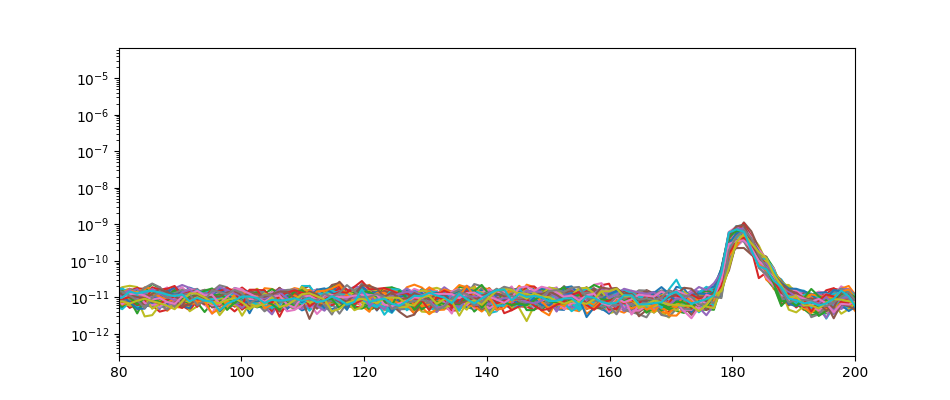

[(80, 200)]

In [110]:
bbb = bdf_mc200[0]
_,ax = plt.subplots(figsize=(9.5,4))
_ = [ax.semilogy(*bdf_.welch_psd('x')) for bdf_ in bdf_mc200]
ax.set(xlim=(80,200))

In [121]:
bbb = bdf_mc200[0]
fft = np.fft.rfft(bbb.x2, norm='ortho')
freq = np.fft.rfftfreq(len(bbb.x2), 1/5000.)

In [122]:
bins4sigma = fft[(freq>80)*(freq<130)]
